# Bikesharing Case study 

Problem Statement - A US bike-sharing provider BoomBikes has not been doing well financially due to pandemic situation , lockdown
etc.They are trying to analyse the bike usage data and associated influencing features which is impacting same.Thus they expect 
to have control on the impact these independent variable/factors are having on their perfomance.

Output of this case study
1)  Features impacting the bike count rented on a day 
2)  Impact of these feature variables on the count in terms of a linear expression

## Understanding & Analysing Data 

In [275]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [276]:
# Importing data.csv
bikesharing = pd.read_csv('day.csv')

In [277]:
# Studying the data colum n types
bikesharing.info()

# All columns seems having non null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [278]:
# Checking the data content 

bikesharing.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [279]:
bikesharing.shape

(730, 16)

In [280]:
# Studying the year column , at the initial look , this seemed like ,may not have significance ; but since it indicates the year 
# it was decided to keep as is , in order to check whether demand varied between these years

print( bikesharing.yr.value_counts())

0    365
1    365
Name: yr, dtype: int64


In [281]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Output variable & unwanted columns 
1) The dependent variable or output variable ,cnt - which denotes the total bike hired
on a day which in turn is proportional to the revenue and maintainence cost that the bike sharing 
firm would be focussing on 
2) Removing Unwanted columns or columns which doesnt seem influence cnt column 
-instant: record index  - it represents an Id
-dteday : date - as this is a time series problem 
-causal  - not a feature , but an outcome similar to cnt 
-Registered  - not a feature , but an outcome similar to cnt 

In [282]:
# Dropping columns

bikesharing.drop(["instant","dteday","casual","registered"], axis = 1 , inplace=True)
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Data Visualisation : Numeric variables

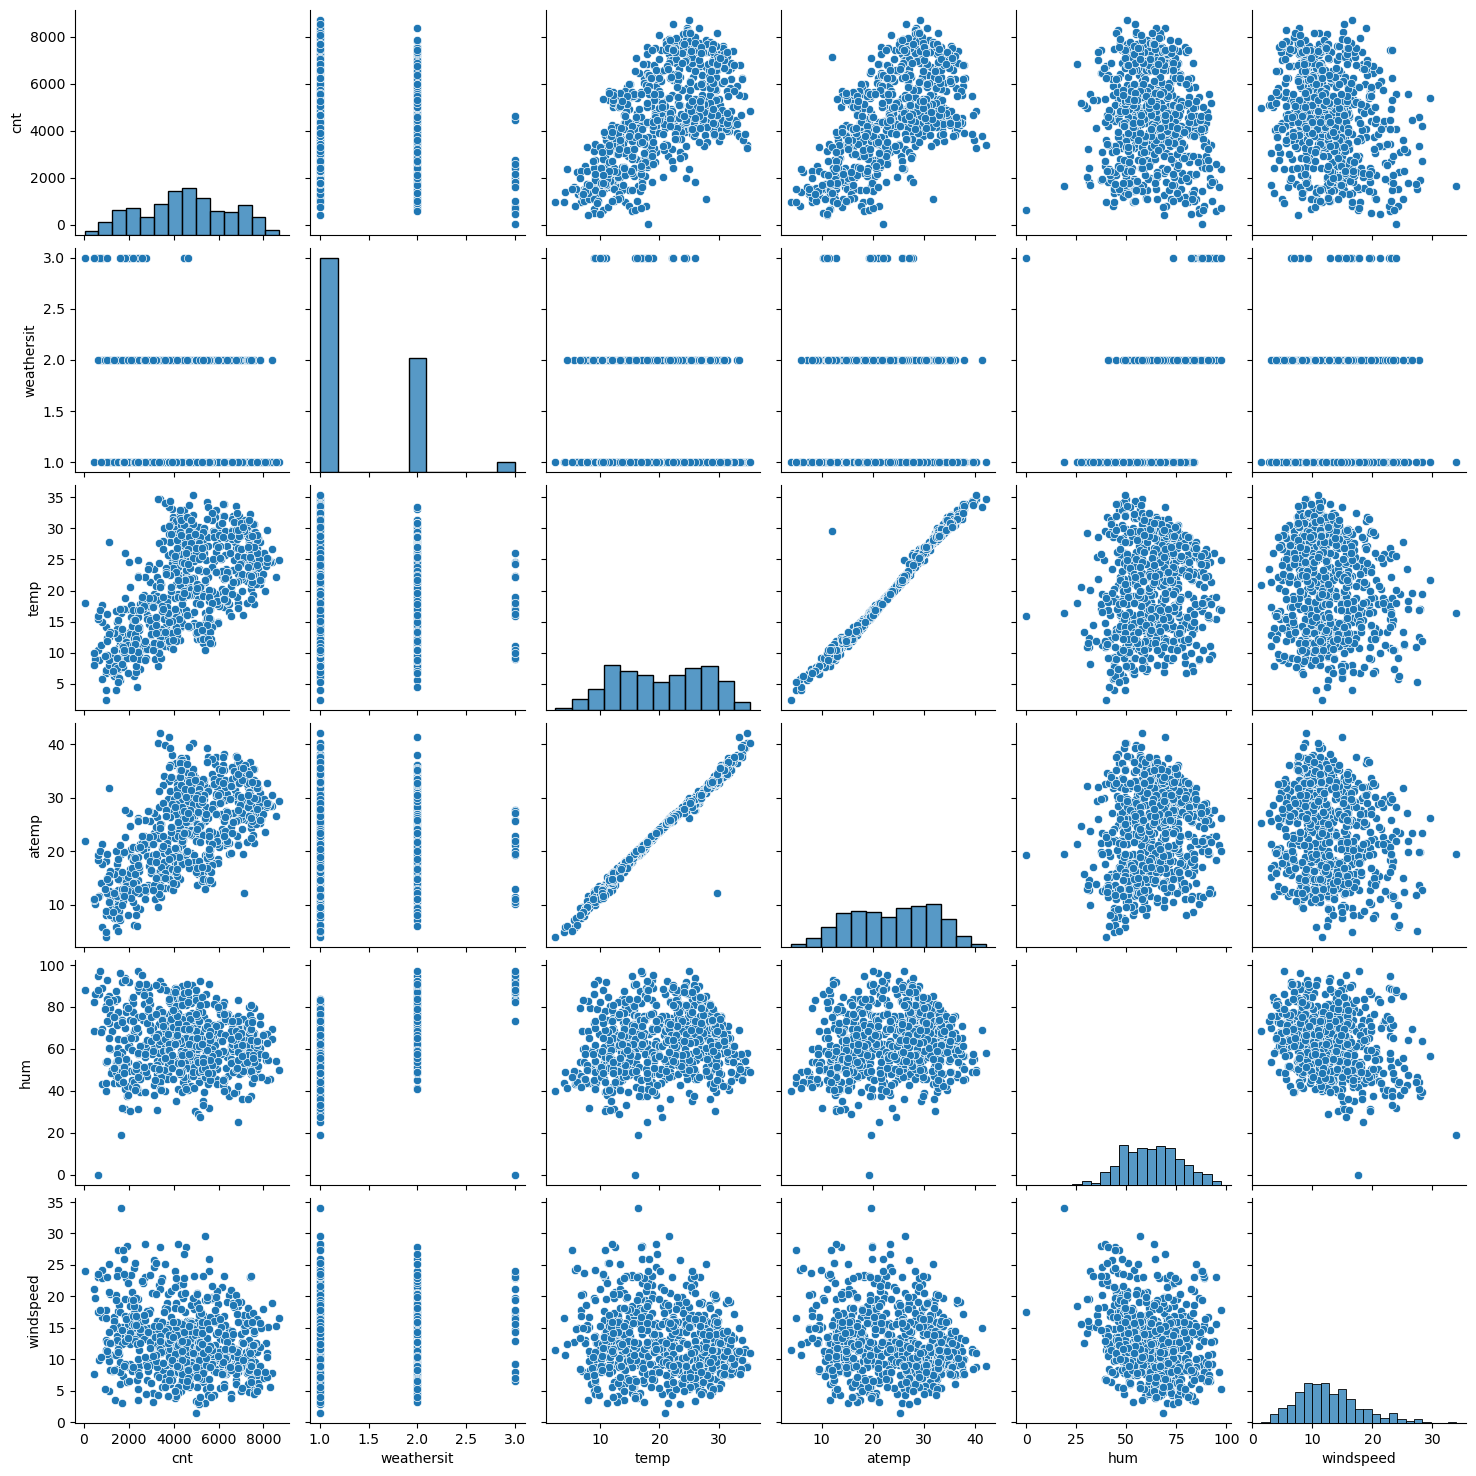

In [283]:
# Visualise the data - numeric variables 
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(bikesharing, vars=['cnt','weathersit','temp','atemp','hum','windspeed'])
plt.show()

Inferences :  cnt seems to have a clear linear relationship with temp and atemp. Also seems to be linked humidity and windspeed.

# Visualising the categorical values 

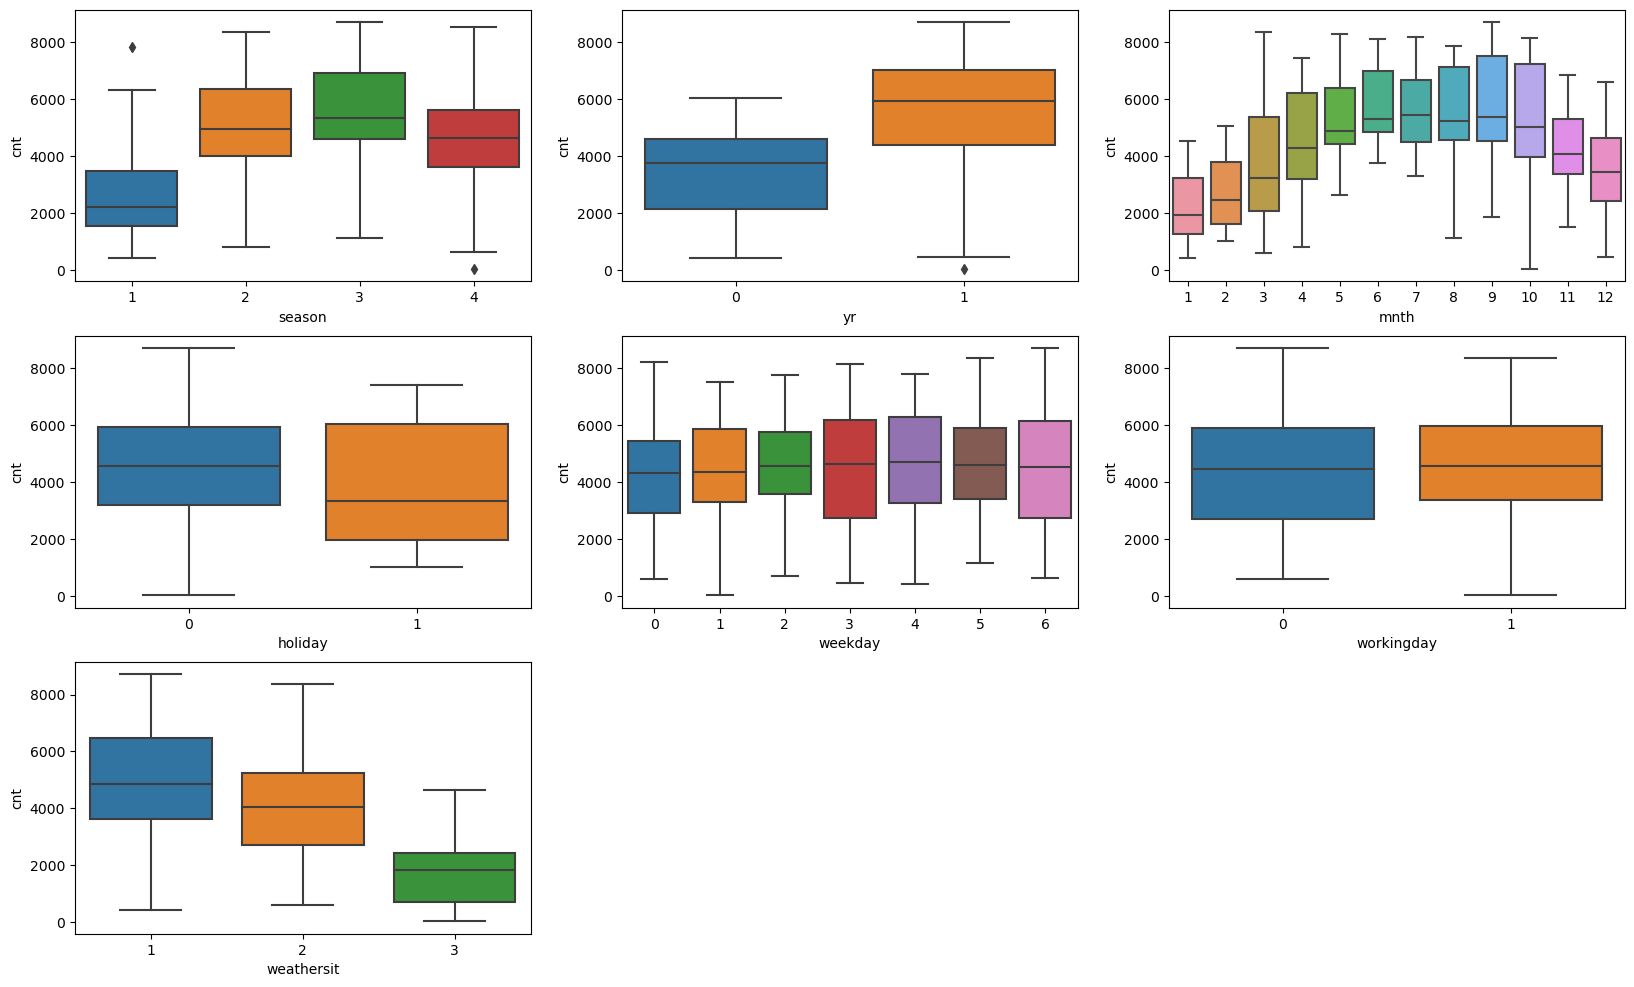

In [284]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()


Preliminary Observations:
    1) 2019 seems to have good usage for bikes
    2) When it is a holiday in terms of volume , it seems like good impact on count 
    3) There seems like a pattern of increase demand as month progresses
    4) During season 2& 3 , there seems to be a high demand 
    

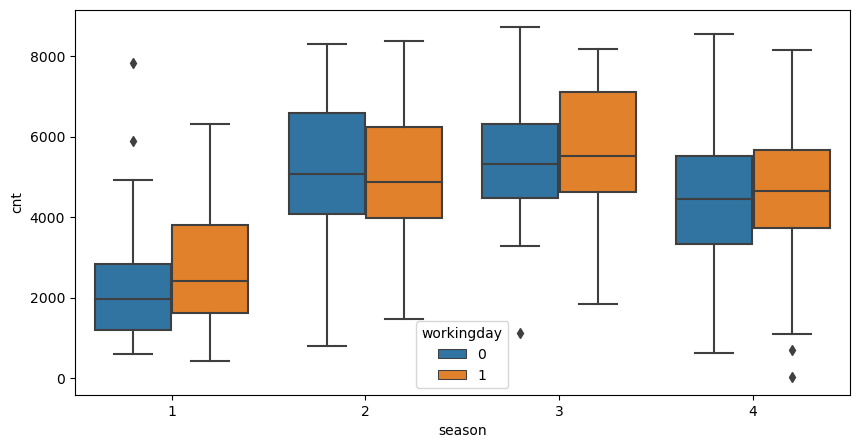

In [285]:
# Also plotting the holiday & season to see any glaring relation using hue argument .
# Below is the plot for season with holiday as the hue.

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bikesharing)
plt.show()

Observation : During season 2 ,3,4 , the demand seems to be high relatively on working day  

# Dummy Variables conversion ; below features are identified which is taking non binary values
1) season
2) Month
3) weathersit

In [286]:
# 1) Using dummy variables for the feature 'season' and store it in a new dataframe - 'seasonal'

seasonal = pd.get_dummies(bikesharing['season'])

seasonal.rename(columns={seasonal.columns[0]:'spring',seasonal.columns[1] : 'summer' ,seasonal.columns[2] :'fall' ,seasonal.columns[3] :'winter'},inplace=True)

seasonal.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Dropping the spring column, and season would correspond as below 

000 - spring
100 - summer
010 - fall
001 - winter 

In [287]:
# Let's drop the first column from seasonal which represents spring 

seasonal = seasonal.drop(seasonal.columns[0],axis=1)
seasonal.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [288]:
# Concate the Seasonal dataframe to the original bikesharing dataframe

bikesharing = pd.concat([bikesharing, seasonal], axis = 1)

# check the bikesharing df

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [289]:
# 2) Using dummy variables for the feature 'mnth' and store it in a new dataframe - 'month'

month = pd.get_dummies(bikesharing['mnth'])



month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [290]:
month.rename(columns={month.columns[0]:'Jan',
                      month.columns[1] :'Feb' ,
                      month.columns[2] :'Mar' ,
                      month.columns[3] :'Apr',
                      month.columns[4] :'May',
                      month.columns[5] :'Jun',
                      month.columns[6] :'Jul',
                      month.columns[7] :'Aug', month.columns[8] : 'Sep', month.columns[9] : 'Oct',month.columns[10] :'Nov',month.columns[11] :'Dec'},inplace=True)

In [291]:
month.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


Dropping the Jan column, and month would correspond as below

000000000000 - Jan, Feb - 10000000000 ,Mar -010000000000 and so on..

In [292]:
# Let's drop the first column from seasonal which represents spring 

month = month.drop(month.columns[0],axis=1)
month.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [293]:
# Concate the month dataframe to the original bikesharing dataframe

bikesharing = pd.concat([bikesharing, month], axis = 1)

# check the bikesharing df

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [294]:
## **3) Using dummy variables for the feature 'weathersit' and store it in a new dataframe - 'Weather'**

bikesharing.weathersit.value_counts()

## Though data dict says this column can take 4 values for weather situation  , only 3 catgories seems to be 
## available in this data set !!!


1    463
2    246
3     21
Name: weathersit, dtype: int64

In [295]:
# Conevrting to dummy variable
weather = pd.get_dummies(bikesharing['weathersit'])
weather.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [296]:
weather.rename(columns={weather.columns[0]:'Clear',weather.columns[1] : 'Mist' ,weather.columns[2] :'Light_Snow'},inplace=True)

weather.head()

,Clear,Mist,Light_Snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [297]:
# Deciding to keep the first column as- is so that the representation remains same for future analysis as well

# 100 - Clear
# 010 - Mist
# 001 - Light_Snow
# 000 - Heavy rain 

In [298]:
# Concate the month dataframe to the original bikesharing dataframe

bikesharing = pd.concat([bikesharing, weather], axis = 1)

# check the bikesharing df

bikesharing.head()

# dropping the columns for which we have summy variables 

bikesharing = bikesharing.drop(columns=['season','mnth','weathersit'] , axis =1 )
bikesharing.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Mist,Light_Snow
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting the data into Train and Test 

In [299]:
from sklearn.model_selection import train_test_split

# Going for 70:30 split of data 

df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Mist,Light_Snow
653,1,0,2,1,19.201653,23.0423,55.8333,12.208807,7534,0,...,0,0,0,0,1,0,0,1,0,0
576,1,0,2,1,29.246653,33.1448,70.4167,11.083475,7216,0,...,0,1,0,0,0,0,0,1,0,0
426,1,0,6,0,16.980847,20.6746,62.1250,10.792293,4066,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,...,0,0,0,0,0,0,1,1,0,0
482,1,0,6,0,15.443347,18.8752,48.9583,8.708325,4220,1,...,0,0,0,0,0,0,0,0,1,0


# ReScaling of Features which are continous & numerical 

In [300]:
# temp , atemp , hum , windspeed  are the continous variables which would be re-scaled

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [301]:
# Apply scaler() to all the columns where dummy variables havent created 
num_vars = ['temp', 'atemp', 'hum' ,'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Mist,Light_Snow
653,1,0,2,1,0.509887,0.501133,0.575354,0.300794,7534,0,...,0,0,0,0,1,0,0,1,0,0
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,7216,0,...,0,1,0,0,0,0,0,1,0,0
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,4066,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,1796,0,...,0,0,0,0,0,0,1,1,0,0
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,4220,1,...,0,0,0,0,0,0,0,0,1,0


In [302]:
df_train.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Mist,Light_Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,2.990196,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.245098,...,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.627451,0.343137,0.029412
std,0.500429,0.157763,2.017093,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.430568,...,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations : All Features after creating dummy variables and min-max scaling  - the values are within 0 and 1 .
Other than Y variable or output variable cnt

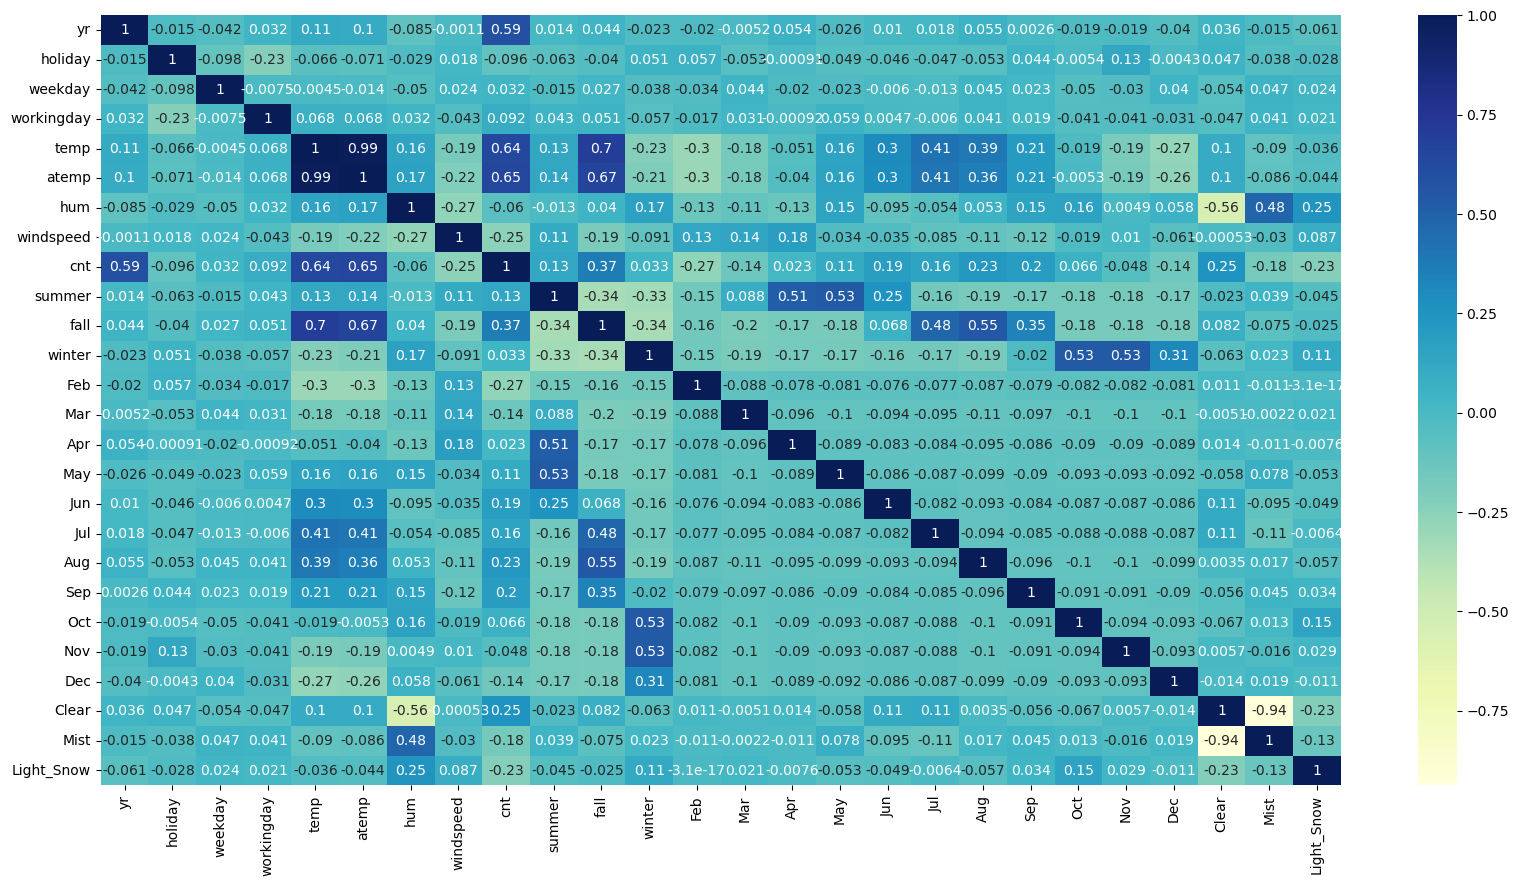

In [303]:
# heatmap
plt.figure(figsize =(20,10))
sns.heatmap(df_train.corr(),annot=True ,cmap='YlGnBu')
plt.show()

# Creating X and y sets for modeling 

In [304]:
y_train = df_train.pop('cnt')
X_train = df_train

In [305]:
X_train.shape

(510, 25)

# Creating model Using RFE ( Recursive Feature Elimination )

In [306]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15 , step=1)   # running RFE to choose 15 variables to begin with 
rfe = rfe.fit(X_train, y_train)

In [307]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 11),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Feb', False, 6),
 ('Mar', True, 1),
 ('Apr', False, 3),
 ('May', False, 2),
 ('Jun', False, 4),
 ('Jul', False, 9),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 8),
 ('Dec', False, 7),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light_Snow', True, 1)]

In [308]:
# Taking only the 15 columns suggested by RFE 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'Mar', 'Aug', 'Sep', 'Oct', 'Clear', 'Mist', 'Light_Snow'],
      dtype='object')

In [309]:
# negated columns are as below - 10 in numbers 
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'Feb', 'Apr', 'May', 'Jun', 'Jul',
       'Nov', 'Dec'],
      dtype='object')

# Buidling Linear regression model for further analysis 

In [310]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [311]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [312]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [313]:
#Checking the summary of statistics
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          9.02e-190
Time:                        22:26:39   Log-Likelihood:                -4112.4
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     495   BIC:                             8318.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        871.6420    210.816      4.135      0.0

Inference : After checking the p- value , it is noticed that "fall" has insignificant influence on the output variable

In [314]:
# Dropping fall 

X_train_new1 = X_train_rfe.drop(["fall"], axis = 1)

In [315]:
# Rebuilding the model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [316]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [317]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          2.26e-190
Time:                        22:26:39   Log-Likelihood:                -4113.8
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     496   BIC:                             8315.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        887.2688    210.938      4.206      0.0

In [318]:
# Again Mar variable seems to be having a high p value , dropping the column and re running the model

X_train_new2 = X_train_rfe.drop(["Mar","fall"], axis = 1)


In [319]:
# Rebuilding the model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [320]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          6.02e-191
Time:                        22:26:39   Log-Likelihood:                -4115.2
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     497   BIC:                             8312.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        934.2577    209.461      4.460      0.0

In [321]:
# checking the columns after cleaning up based on p value 
X_train_new2.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Clear', 'Mist', 'Light_Snow'],
      dtype='object')

In [322]:
# Preparing for checking the multi-colinearity among variables 

X_train_new2 = X_train_new2.drop(['const'], axis=1)

In [323]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Clear,28.78
11,Mist,21.98
12,Light_Snow,3.37
3,hum,1.87
6,winter,1.72
2,temp,1.59
9,Oct,1.49
7,Aug,1.45
5,summer,1.38
8,Sep,1.24


In [324]:
# Dropping the column 'clear' whose VIF is much greater than 5

X_train_new3 = X_train_rfe.drop(["Mar","fall","Clear"], axis = 1)


In [325]:
# Rebuilding the model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [326]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          6.02e-191
Time:                        22:26:40   Log-Likelihood:                -4115.2
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     497   BIC:                             8312.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2099.6034    234.805      8.942      0.0

In [327]:
#Checking for Multi-colinearity factor again

X_train_new3 = X_train_new3.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,winter,2.27
10,Mist,2.13
0,yr,2.02
5,summer,1.83
9,Oct,1.61
7,Aug,1.60
8,Sep,1.34


In [328]:
# Removing "hum" column as well

# Dropping the column 'clear' whose VIF is much greater than 5

X_train_new4 = X_train_rfe.drop(["Mar","fall","Clear" ,"hum"], axis = 1)

# Rebuilding the model
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model


In [329]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          3.21e-187
Time:                        22:26:41   Log-Likelihood:                -4126.9
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1200.0447    145.814      8.230      0.0

In [330]:
#Checking for Multi-colinearity factor again

X_train_new4 = X_train_new4.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,winter,1.95
4,summer,1.82
8,Oct,1.60
6,Aug,1.59
9,Mist,1.49
7,Sep,1.34
10,Light_Snow,1.09


In [333]:
#VIF seems to be less or equal to 5.11 , hence retaining this list of variables

X_train_new4.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter', 'Aug', 'Sep',
       'Oct', 'Mist', 'Light_Snow'],
      dtype='object')

# Residual analysis of train data

Text(0.5, 0, 'Errors')

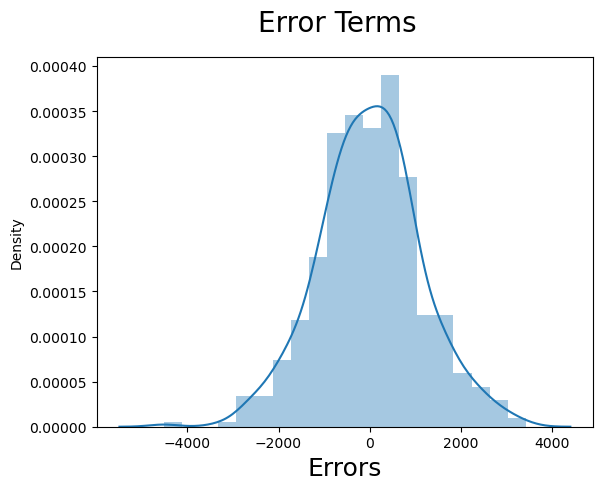

In [334]:
y_train_cnt = lm.predict(X_train_lm)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Observations :
    1) Error terms when plotted is  forming a normal distribution curve 
    2) center or mean is zero
    3) error terms have a constant variance

# Making predictions using test data 

In [335]:
num_vars = ['temp', 'atemp', 'hum' ,'windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Clear,Mist,Light_Snow
184,0,1,1,0,0.837241,0.778767,0.534223,0.149393,6043,0,...,0,1,0,0,0,0,0,0,1,0
535,1,0,3,1,0.911423,0.855132,0.470417,0.231142,6211,1,...,1,0,0,0,0,0,0,1,0,0
299,0,0,4,1,0.496221,0.492359,0.777843,0.443398,2659,0,...,0,0,0,0,1,0,0,0,1,0
221,0,0,3,1,0.890387,0.805661,0.236659,0.449707,4780,0,...,0,0,1,0,0,0,0,1,0,0
152,0,0,4,1,0.821739,0.749249,0.070765,0.682387,4968,1,...,1,0,0,0,0,0,0,1,0,0


In [266]:
# Dividing X and y 

y_test = df_test.pop('cnt')
X_test = df_test

In [268]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [269]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

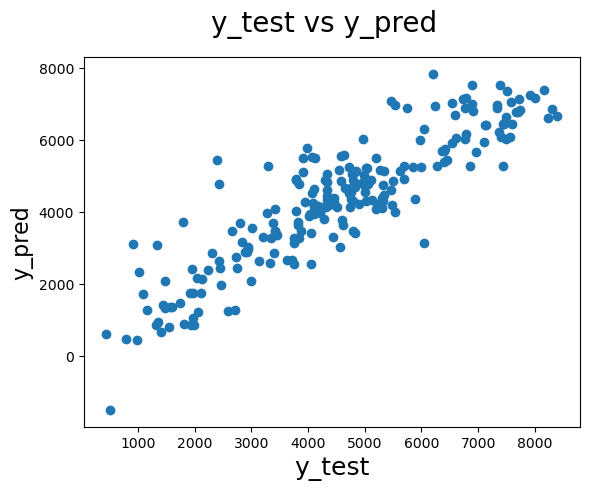

In [270]:
# Model Evaluation 

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

The equation of our best fitted line is:

cnt = 2099.6034 + yr X 1988.66 - holiday X 820 + temp X 4614.32 -hum X 1567.36 -windpeed X 1623 + summer X 910.94 
+ winter X 1175.73+ Aug X 511.27 + Sep X 1112.47 + Oct X 335.62 -Mist X 474 -Light_snow X 2087


In [274]:
#Comparing r2_score for test 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_score(y_true= y_test , y_pred=y_pred)

0.782207779400635

Conclusion :  the r2 square for train and test are comparable 

train = 83.6%
test = 78.22%

The difference is in the allowed range of ~ 5%